In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import secondary_utils as su
import frc_utils as frc_util
import imageio
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

In [2]:
paths = ["/Users/ecem/Desktop/Screenshot 2023-11-26 at 00.10.38.png",
        "/Users/ecem/Desktop/Screenshot 2023-11-26 at 14.09.55.png",
        "/Users/ecem/Desktop/Screenshot 2023-11-26 at 15.33.55.png"]

In [3]:
def crop(path, sx, sy, dim_x , dim_y):
    img = cv2.imread(path)
    
    crop = img[sy:sy + dim_y, sx:sx + dim_x]
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    return gray

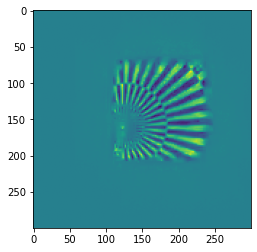

In [4]:
img = cv2.imread(paths[0])[1200:1500, 1250:1550]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [18]:
gray_blurred = cv2.GaussianBlur(gray,(11,11),0)

ret3,thresh= cv2.threshold(gray_blurred,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(thresh,  
                   cv2.HOUGH_GRADIENT, 1, 80, param1 = 20, 
               param2 = 9, minRadius = 120, maxRadius = 200) 

print(detected_circles)

# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 

    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
        
        from skimage.draw import circle_perimeter
        # Draw the circumference of the circle. 
        cv2.circle(img, (a, b), r, (0, 255, 0), 2) 
  
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
 
else:
    print("Circle is not found")

[[[278.5 197.5 127.6]
  [259.5  93.5 146.2]
  [203.5  23.5 135.9]
  [125.5   5.5 123.2]
  [286.5 277.5 178.2]
  [ 61.5 291.5 137. ]]]


In [23]:
from skimage.draw import circle_perimeter

gray_blurred = cv2.GaussianBlur(gray,(11,11),0)

ret3,thresh= cv2.threshold(gray_blurred,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(thresh,  
                   cv2.HOUGH_GRADIENT, 1, 80, param1 = 20, 
               param2 = 9, minRadius = 120, maxRadius = 200) 

print(detected_circles)

# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 

    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
        
        
        # Draw the circumference of the circle. 
        rr,cc = circle_perimeter( a, b, r)
        gray[rr, cc] = 1
        plt.imshow(gray)
  
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3) 
 
else:
    print("Circle is not found")

[[[278.5 197.5 127.6]
  [259.5  93.5 146.2]
  [203.5  23.5 135.9]
  [125.5   5.5 123.2]
  [286.5 277.5 178.2]
  [ 61.5 291.5 137. ]]]
[406 150 406 150 278 278 278 278 406 150 406 150 279 277 279 277 406 150
 406 150 280 276 280 276 406 150 406 150 281 275 281 275 406 150 406 150
 282 274 282 274 406 150 406 150 283 273 283 273 406 150 406 150 284 272
 284 272 406 150 406 150 285 271 285 271 406 150 406 150 286 270 286 270
 406 150 406 150 287 269 287 269 406 150 406 150 288 268 288 268 406 150
 406 150 289 267 289 267 405 151 405 151 290 266 290 266 405 151 405 151
 291 265 291 265 405 151 405 151 292 264 292 264 405 151 405 151 293 263
 293 263 405 151 405 151 294 262 294 262 405 151 405 151 295 261 295 261
 405 151 405 151 296 260 296 260 405 151 405 151 297 259 297 259 404 152
 404 152 298 258 298 258 404 152 404 152 299 257 299 257 404 152 404 152
 300 256 300 256 404 152 404 152 301 255 301 255 404 152 404 152 302 254
 302 254 404 152 404 152 303 253 303 253 403 153 403 153 304 25

IndexError: index 406 is out of bounds for axis 0 with size 300

In [6]:
from skimage import feature

Text(0.5, 1.0, 'Canny filter, $\\sigma=2$')

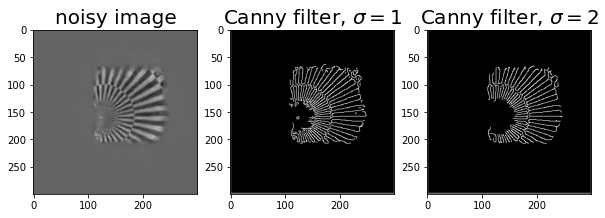

In [7]:
# Compute the Canny filter for two values of sigma
edges1 = feature.canny(gray)
edges2 = feature.canny(gray, sigma=2)

# display results
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('noisy image', fontsize=20)

ax[1].imshow(edges1, cmap='gray')
ax[1].set_title(r'Canny filter, $\sigma=1$', fontsize=20)

ax[2].imshow(edges2, cmap='gray')
ax[2].set_title(r'Canny filter, $\sigma=2$', fontsize=20)

In [8]:
blurred = cv2.medianBlur(gray, 5)
rows = gray.shape[0]
#_, thresholded = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)

circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, rows / 2,
                           param1=100, param2=30,
                           minRadius=1, maxRadius=30)

In [9]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(gray, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(gray, center, radius, (255, 0, 255), 3)

In [10]:
circles

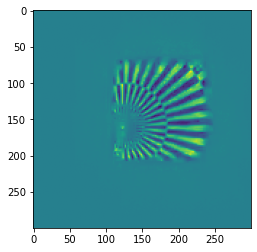

In [11]:
plt.imshow(gray)

In [15]:
if img is None:
    print("Could not open image...")
    exit()

# Convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Set dilation parameters
dilation_type = 0
dilation_elem = 0

if dilation_elem == 0:
    dilation_type = cv2.MORPH_RECT
elif dilation_elem == 1:
    dilation_type = cv2.MORPH_CROSS
elif dilation_elem == 2:
    dilation_type = cv2.MORPH_ELLIPSE

size = 1
element = cv2.getStructuringElement(dilation_type, (2 * size + 1, 2 * size + 1), (size, size))
#cv2.morphologyEx(img, img, cv2.MORPH_OPEN, element)

# Extract points
points = []
for x in range(img.shape[1]):
    for y in range(img.shape[0]):
        if img[y, x] > 0:
            points.append(np.array([x, y], dtype=np.float32))

# Least Square Algorithm
n = len(points)
xn, xsum = 0, 0
yn, ysum = 0, 0

for point in points:
    xsum += point[0]
    ysum += point[1]

xn = xsum / n
yn = ysum / n

ui, vi = 0, 0
suu, suuu = 0, 0
svv, svvv = 0, 0
suv, suvv, svuu = 0, 0, 0

for point in points:
    ui = point[0] - xn
    vi = point[1] - yn

    suu += ui * ui
    suuu += ui * ui * ui

    svv += vi * vi
    svvv += vi * vi * vi

    suv += ui * vi

    suvv += ui * vi * vi
    svuu += vi * ui * ui

A = np.array([[suu, suv], [suv, svv]], dtype=np.float32)
B = np.array([[0.5 * (suuu + suvv)], [0.5 * (svvv + svuu)]], dtype=np.float32)

abc = np.linalg.solve(A, B)

u = abc[0, 0]
v = abc[1, 0]

x = u + xn
y = v + yn

alpha = u * u + v * v + ((suu + svv) / n)
r = np.sqrt(alpha)

# Convert back to BGR
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Draw circle
cv2.circle(img, (int(x), int(y)), int(r), (255, 0, 0), 1, 8, 0)

# Display the result
cv2.imshow("window", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.5.1) ../modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [13]:
img=np.uint8(img)

In [14]:
import cv2
import numpy as np

def main():
    color = np.array(img)
    cv2.namedWindow("input")
    cv2.imshow("input", color)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    canny = cv2.Canny(gray, 200, 20)
    cv2.namedWindow("canny2")
    cv2.imshow("canny2", canny > 0)

    circles = cv2.HoughCircles(np.gray, cv2.HOUGH_GRADIENT, 1, 60, param1=200, param2=20, minRadius=0, maxRadius=0)

    if circles is not None:
        circles = np.uint16(np.around(circles))

        for i in circles[0, :]:
            center = (i[0], i[1])
            radius = i[2]

            cv2.circle(color, center, 3, (0, 255, 255), -1)
            cv2.circle(color, center, radius, (0, 0, 255), 1)

    dt = cv2.distanceTransform(255 - (canny > 0).astype(np.uint8), cv2.DIST_L2, 3)
    cv2.namedWindow("distance transform")
    cv2.imshow("distance transform", dt / 255.0)

    min_inlier_dist = 2.0

    if circles is not None:
        for i in circles[0, :]:
            center = (i[0], i[1])
            radius = i[2]

            max_inlier_dist = radius / 25.0
            if max_inlier_dist < min_inlier_dist:
                max_inlier_dist = min_inlier_dist

            counter = 0
            inlier = 0

            for t in np.arange(0, 2 * np.pi, 0.1):
                counter += 1
                cX = int(radius * np.cos(t) + i[0])
                cY = int(radius * np.sin(t) + i[1])

                if dt[cY, cX] < max_inlier_dist:
                    inlier += 1
                    cv2.circle(color, (cX, cY), 3, (0, 255, 0), -1)
                else:
                    cv2.circle(color, (cX, cY), 3, (255, 0, 0), -1)

            print(f"{100.0 * inlier / counter:.2f}% of a circle with radius {radius} detected")

    cv2.namedWindow("output")
    cv2.imshow("output", color)
    cv2.imwrite("houghCirclesComputed.png", color)

    cv2.waitKey(-1)

if __name__ == "__main__":
    main()


error: OpenCV(4.5.1) ../modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [6]:
noise1 = np.random.normal(0,1,(300,300,3))*100
noise2 = np.random.normal(0,1,(300,300,3))*100

In [7]:
mes1 = noise1 + img
mes2 = noise2 + img


Fourier ring correlation provides an easy-to-use, laboratory consistent standard for measuring the resolution of SRM images.

FRC is a method commonly used for determining the resolution of electron microscopic (EM) recon- structions (Saxton and Baumeister, 1982). FRC evaluates the similarity of two independent reconstructions of the same object in frequency space to determine the resolution threshold (the spatial frequency) at which both reconstructions are consistent. Up to this spatial frequency the object is considered to be resolved.

Fourier Ring Correlation (FRC) has become a popular and relatively unbiased method of estimating image quality/resolution recently, especially in localization-based superresolution microscopy. The main idea is to take two independent images of the same object, calculate their Fourier Tranforms and calculate the correlation of “rings” of increasing frequency in the two spectra. The rings should be correlated for low frequencies until one reaches the resolution limit of the microscope.

Fourier ring correlation measures the degree of correlation of the two images at different spatial frequencies (Saxton and Baumeister, 1982). In order to calculate the Fourier ring correlation, the coordinates resulting from localization based super-resolution experiment are randomly split into two independent datasets (see workflow in Fig. 1). Each dataset is then binned with a definite pixel size into a super-resolution image. The super-resolution image pixel size determines the maximum frequency that can be resolved in the image according to the Nyquist criterion (see Supplementary Information and manual for examples). To calculate the correlation, the images are then Fourier transformed and multiplied. The normalized average correlation is computed for Nr concentric rings of increasing radius (corresponding to increasing spatial frequencies) centered around the (0,0) spatial frequency. The number of rings determines the binning of the FRC curve.

1. The number of rings (Nr), the input data and the super-resolu- tion image pixel size are required as input.
2. The input data are shifted in order to start from pixel position (0,0).
3. Two super-resolution images (of user defined pixel size and dimension set to include all the coordinates) are generated from the input positions by assigning each event randomly to one of the two images. The two images are Fourier transformed and the correlation image is computed as c 1⁄4 eI 1  eI 2 . The FRC and the 2r curves are then computed for Nr rings according to (Saxton and Baumeister, 1982).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


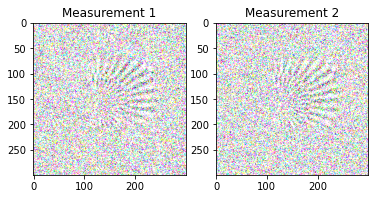

In [8]:
f, axrr = plt.subplots(1, 2)
axrr[0].imshow(mes1, cmap='Greys_r')
axrr[0].set_title('Measurement 1')
axrr[1].imshow(mes2, cmap='Greys_r')
axrr[1].set_title('Measurement 2')
plt.show()

In [9]:
xf, frc, _, _ = frc_util.FRC(mes1, mes2, inscribed_rings=True, 
                             analytical_arc_based= True)

performed by index method
performed by index method
performed by index method


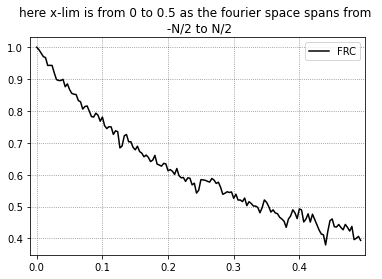

In [10]:
plt.xlim(-0.01, 0.5)
plt.plot(xf[:-1]/2, frc[:-1], label = 'FRC', color='black')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.title('here x-lim is from 0 to 0.5 as the fourier space spans from \n -N/2 to N/2')
plt.legend()
plt.show()

ring plots is: False
performed by index method


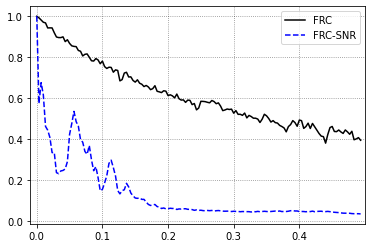

In [11]:
r_ind = frc_util.ring_indices(mes1[:,:,0], inscribed_rings=True, plot=False)
fft_lena     = fft.fftshift(fft.fft2(img[:,:,0]))
fft_n1       = fft.fftshift(fft.fft2(mes1[:,:,0]))
frc4rmSNR    = frc_util.frc_4rm_snr(r_ind, fft_lena, fft_n1)

plt.xlim(-0.01, 0.5)                                 
plt.plot(xf[:-1]/2, frc[:-1], label = 'FRC', color='black')
plt.plot(xf[:-1]/2, frc4rmSNR[:-1], '--', label = 'FRC-SNR', color='blue')                                
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.legend()
plt.show()

In [26]:
_, _, x_T, T = frc_util.FRC(mes1, mes1, thresholding='half-bit', info_split=False)

performed by index method
performed by index method
performed by index method


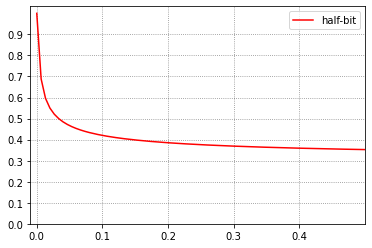

In [27]:
plt.xlim(-0.01, 0.5)
plt.plot(x_T[:-1], T[:-1], label = 'half-bit', color='red')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))

plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.legend()
plt.show()

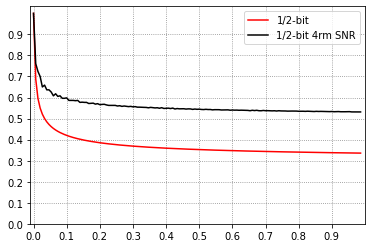

In [37]:
real_frc4rmSNR    = frc_util.frc_4rm_snr(r_ind, img, img)

plt.xlim(-0.01, 1)
plt.plot(x_T[:-1], T[:-1], label = '1/2-bit', color='red')
plt.plot(x_T[:-1], real_frc4rmSNR[:-1], label = '1/2-bit 4rm SNR', color='black')
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
plt.grid(linestyle='dotted', color='black', alpha=0.5) 
plt.legend()
plt.show()

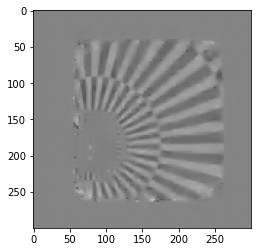

In [6]:
img2 = cv2.imread(paths[-1])[1200:1500, 1475:1775]
plt.imshow(img2)